# За основу взят датасет о потреблении ресурсов разными регионами облачной платформы за определённые даты времени.

Загрузим его и проведём необходимые манипуляции, что бы привести его к лучшему виду, а затем исследуем эти данные.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
# Загрузим наш датасет с ресурсами
dataset = pd.read_csv('https://raw.githubusercontent.com/WolfusFlow/Data-Science/master/my_csv.csv', delimiter=',')#, header=None).values #index_col=False

In [3]:
#Отобразим его
dataframe = pd.DataFrame(dataset)
dataframe.info()
dataframe
# resource_pool уже был ранее перекодирован из строковых значений
# с помощью функции LabelEncoder() 
# Что бы анонимизировать данные перед работой с ними

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          454 non-null    int64  
 1   Date                454 non-null    object 
 2   resource_pool       454 non-null    int64  
 3   VCPU, quota         454 non-null    int64  
 4   VCPU, Allocated     454 non-null    float64
 5   VCPU, Used          454 non-null    float64
 6   RAM, quota          454 non-null    int64  
 7   RAM, Allocated      454 non-null    int64  
 8   RAM, Used           454 non-null    float64
 9   Storage, quota      454 non-null    int64  
 10  Storage, Allocated  454 non-null    int64  
 11  Storage, Used       454 non-null    float64
dtypes: float64(4), int64(7), object(1)
memory usage: 42.7+ KB


,Unnamed: 0,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
0,0,2019.12.02,0,3200,1152.0,36.000000,32756,3798,11.594822,102395,49519,48.360760
1,1,2019.12.02,1,11200,9453.0,84.401786,54017,35531,65.777440,591000,504770,85.409475
2,2,2019.12.02,2,6448,5515.0,85.530397,46506,21171,45.523158,372234,289444,77.758614
3,3,2019.12.02,3,61410,51233.0,83.427780,633358,208078,32.853142,3307535,2600949,78.637082
4,4,2019.12.02,4,39323,38548.0,98.029143,224953,164402,73.082822,3002226,2346392,78.155076
...,...,...,...,...,...,...,...,...,...,...,...,...
449,449,2019.05.20,13,14400,0.0,0.000000,147397,0,0.000000,563170,0,0.000000
450,450,2019.05.20,14,1600,0.0,0.000000,16377,0,0.000000,76796,0,0.000000
451,451,2019.05.20,15,1600,0.0,0.000000,16377,0,0.000000,35838,0,0.000000
452,452,2019.05.20,16,2122,426.0,20.075401,14482,3100,21.405883,280653,42466,15.131141


In [4]:
# Поменяем колонки на имена из первой строки и уберём ненужную строку
# Заменим индекс на первый столбец

# a = df[:1:].values
df = dataframe.copy()
# df[df.columns[0]]
# l = df.iloc[:,0].values
          # index=list(l))
# df.columns = list(df[:1:].values)
# df = df.drop([0], axis=0)
print(df.columns[0])
print(df[df.columns[0]].values)
print(df[df.columns[0]].values.astype(int))

# df.index = list(df)
df.index = df[df.columns[0]].values.astype(int)
# df.reset_index(drop=True)
# print(df)
# print(df.columns)
# df.set_index(dataframe[NaN], inplace=True)
df = df.drop(df.columns[0], axis=1)
df.head(10)



Unnamed: 0
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243

,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
0,2019.12.02,0,3200,1152.0,36.000000,32756,3798,11.594822,102395,49519,48.360760
1,2019.12.02,1,11200,9453.0,84.401786,54017,35531,65.777440,591000,504770,85.409475
2,2019.12.02,2,6448,5515.0,85.530397,46506,21171,45.523158,372234,289444,77.758614
3,2019.12.02,3,61410,51233.0,83.427780,633358,208078,32.853142,3307535,2600949,78.637082
4,2019.12.02,4,39323,38548.0,98.029143,224953,164402,73.082822,3002226,2346392,78.155076
5,2019.12.02,5,48200,34824.0,72.248963,493318,190570,38.630255,1870677,1322543,70.698629
6,2019.12.02,6,20840,20431.0,98.037428,127567,92477,72.492886,1918603,1376144,71.726355
7,2019.12.02,7,3200,34.0,1.062500,32761,120,0.366289,102395,560,0.546902
8,2019.12.02,8,3200,947.0,29.593750,32754,4597,14.034927,148472,36518,24.595883
9,2019.12.02,9,48000,6763.0,14.089583,491267,38482,7.833215,1750952,296643,16.941812


In [5]:
df = shuffle(df) #перетосуем
df

,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
307,2019.08.05,16,2122,2046.0,96.418473,14482,14024,96.837453,280653,201881,71.932600
412,2019.06.10,15,1600,0.0,0.000000,16377,0,0.000000,35838,0,0.000000
440,2019.05.27,18,6000,84.0,1.400000,61413,102,0.166089,194550,716,0.368029
413,2019.06.10,16,2122,648.0,30.537229,14482,4915,33.938683,280653,74590,26.577304
202,2019.09.23,8,3200,815.0,25.468750,32754,3773,11.519204,143352,27168,18.951950
...,...,...,...,...,...,...,...,...,...,...,...
211,2019.09.16,0,3200,2418.0,75.562500,31729,10231,32.244949,220149,114687,52.095172
0,2019.12.02,0,3200,1152.0,36.000000,32756,3798,11.594822,102395,49519,48.360760
188,2019.09.30,10,1500,391.0,26.066667,5500,1410,25.636364,31000,22075,71.209677
276,2019.08.19,13,33000,16826.0,50.987879,337782,69284,20.511454,1310650,694007,52.951360


In [6]:
from sklearn import preprocessing

# dataframe = pd.DataFrame(df)
# dataframe.info()

# First 15 rows of our dataset.
print(dataframe.head(15))

def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_dataframe, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_dataframe.head() 


    Unnamed: 0        Date  resource_pool  VCPU, quota  VCPU, Allocated  \
0            0  2019.12.02              0         3200           1152.0   
1            1  2019.12.02              1        11200           9453.0   
2            2  2019.12.02              2         6448           5515.0   
3            3  2019.12.02              3        61410          51233.0   
4            4  2019.12.02              4        39323          38548.0   
5            5  2019.12.02              5        48200          34824.0   
6            6  2019.12.02              6        20840          20431.0   
7            7  2019.12.02              7         3200             34.0   
8            8  2019.12.02              8         3200            947.0   
9            9  2019.12.02              9        48000           6763.0   
10          10  2019.12.02             10         1500           1373.0   
11          11  2019.12.02             11         1084           1054.0   
12          12  2019.12.0

,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
307,11,16,2122,2046.0,96.418473,14482,14024,96.837453,280653,201881,71.932600
412,3,15,1600,0.0,0.000000,16377,0,0.000000,35838,0,0.000000
440,1,18,6000,84.0,1.400000,61413,102,0.166089,194550,716,0.368029
413,3,16,2122,648.0,30.537229,14482,4915,33.938683,280653,74590,26.577304
202,18,8,3200,815.0,25.468750,32754,3773,11.519204,143352,27168,18.951950


In [7]:
print(encoded_dataframe)
encoded_dataframe.describe()

     Date  resource_pool  VCPU, quota  VCPU, Allocated  VCPU, Used  \
307    11             16         2122           2046.0   96.418473   
412     3             15         1600              0.0    0.000000   
440     1             18         6000             84.0    1.400000   
413     3             16         2122            648.0   30.537229   
202    18              8         3200            815.0   25.468750   
..    ...            ...          ...              ...         ...   
211    17              0         3200           2418.0   75.562500   
0      28              0         3200           1152.0   36.000000   
188    19             10         1500            391.0   26.066667   
276    13             13        33000          16826.0   50.987879   
25     27              1        11200           9036.0   80.678571   

     RAM, quota  RAM, Allocated  RAM, Used  Storage, quota  \
307       14482           14024  96.837453          280653   
412       16377               0   0

,Date,resource_pool,"VCPU, quota","VCPU, Allocated","VCPU, Used","RAM, quota","RAM, Allocated","RAM, Used","Storage, quota","Storage, Allocated","Storage, Used"
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,4.540000e+02,4.540000e+02,454.000000
mean,15.526432,9.517621,11137.477974,7087.955947,51.649973,101959.878855,32221.768722,31.318225,5.736477e+05,3.550989e+05,46.503265
std,8.562610,6.045333,12336.963199,10204.442273,34.452693,122730.338372,45942.045032,25.823364,6.392293e+05,5.298224e+05,32.977974
min,0.000000,0.000000,21.000000,0.000000,0.000000,21.000000,0.000000,0.000000,2.100000e+03,0.000000e+00,0.000000
25%,8.000000,4.000000,2800.000000,505.000000,20.997768,28659.000000,2155.000000,9.064542,9.215500e+04,1.777075e+04,15.644516
50%,16.000000,9.000000,6000.000000,2090.000000,49.819188,46698.000000,10797.000000,27.535323,2.853020e+05,9.002000e+04,47.736686
75%,23.000000,15.000000,15440.000000,9181.000000,84.502985,135703.000000,39823.000000,49.443497,8.546920e+05,4.522575e+05,77.688569
max,28.000000,23.000000,61410.000000,51233.000000,126.579987,633358.000000,208078.000000,99.448529,3.307535e+06,2.600949e+06,101.132873


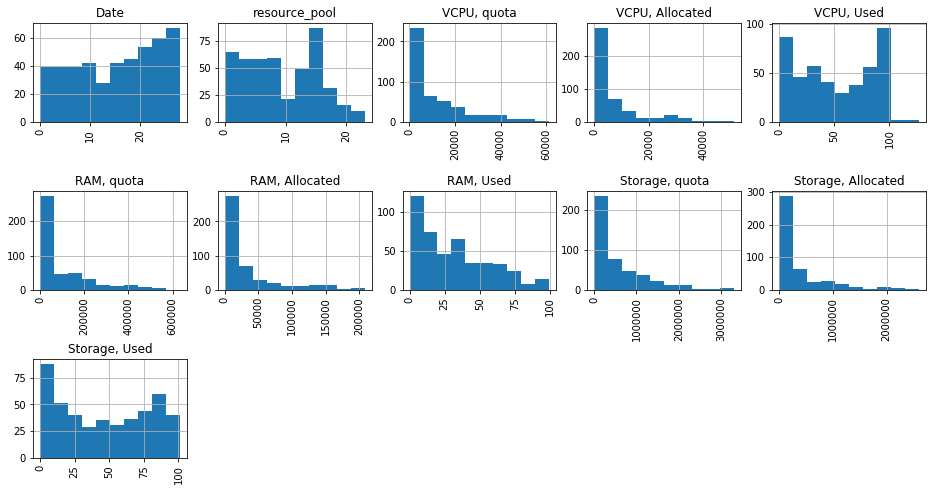

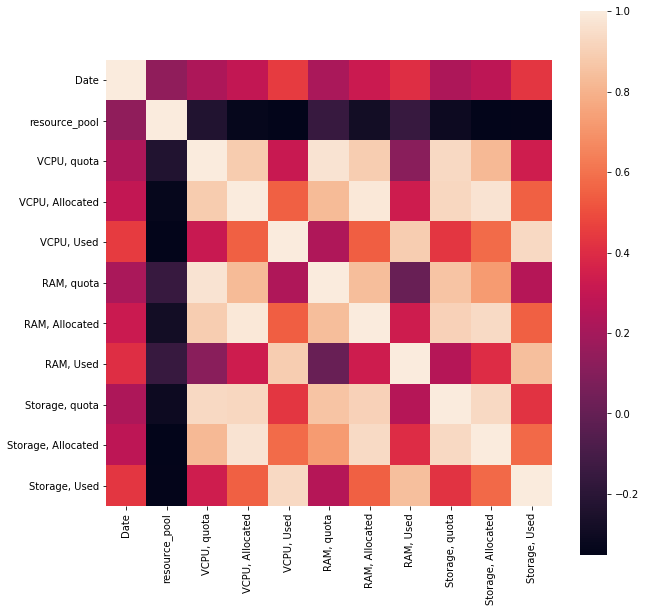

In [8]:
# Построим графики что бы увидеть распределение величин
fig = plt.figure(figsize=(16,8))
cols = 5

rows = np.ceil(float(encoded_dataframe.shape[1]) / cols)
for i, column in enumerate(encoded_dataframe.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_dataframe[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

# Посмотрим, какие присутствуют корреляции

def show_heat_map(dataframe):
  plt.subplots(figsize=(10,10))
  sns.heatmap(dataframe.corr(), square=True)
  plt.show()

# отобразим нашу карту корреляций
show_heat_map(encoded_dataframe)


In [9]:
# encoded_dataframe.drop(columns=['2', '', '13'], axis=0, inplace=True)
# show_heat_map(encoded_dataframe)
# print('\nВ числовом виде - таблица')
# encoded_dataframe.corr()
# Я решил не удалять корреляции и посмотреть, что будте с данными

Сильных корреляций не было выявлено.

Предсказывать будем "RAM, Allocated", то есть фактически использующиеся ресурсы оперативной памяти.
Выделим данный столбец в целевую переменную.

In [10]:
# Посмотрим наши колонки и выберем ту которую будем считаться за целевую переменную, а затем выбросим её из данных
print(df.columns)
print(df.columns[6]) # Ram 
print(df.columns[3]) # CPU
print(df.columns[0]) # Date? don't think so


# print(set(df[df.columns[6]])) Если нам захочется увидеть уникальные значения переменной и это будет целесообразно

# Кодировка one-hot на случай другой целевой переменной, которой она бдуте нужна. Данный метод лучше воспринимается алгоритмами
# y_targer = pd.get_dummies(y_targer)
# y_targer

# Выделим целевую переменную
y = encoded_dataframe[df.columns[6]].values
print(y)
print(y.shape)

encoded_dataframe.drop([df.columns[6]], axis=1, inplace = True)

Index(['Date', 'resource_pool', 'VCPU, quota', 'VCPU, Allocated', 'VCPU, Used',
       'RAM, quota', 'RAM, Allocated', 'RAM, Used', 'Storage, quota',
       'Storage, Allocated', 'Storage, Used'],
      dtype='object')
RAM, Allocated
VCPU, Allocated
Date
[ 14024      0    102   4915   3773   1885  64842 115002   1621  33469
  16355      0   7273   2152  25615   3481 194893   1834 140008  12877
   1341  50432  32231 110014 144313  14716  49538   2907  23236  13412
  15037 163369  22386    245  28605  85090  13235   1886 142462    120
   2152   4563 173114  47282  42839   4223  13089   4149   3305    261
   3773    568  34615  47106  38863 156999      0  40738   8944   3402
  91324   8944   3877 120207  11354   4099   1645  91151   3402  17502
  51512   1505  18313   4812    301      0    245  72853   4384   3595
     58  50430  59909   2068  35531  87288   1624   1024 110272  75168
   1217   6553 158545   4373  99675  12391   1885  29758     24   5889
  56624   9849   5328  10611  10983

In [11]:
# Нормализуем данные

X = encoded_dataframe.values.astype(np.float)
print(X.shape)
print(X, '\n')

X_without_normalizing = X.copy() # Оставим без нормализации для экспериментов

sc = sklearn.preprocessing.StandardScaler()
X = sc.fit_transform(X)
X

(454, 10)
[[1.10000000e+01 1.60000000e+01 2.12200000e+03 ... 2.80653000e+05
  2.01881000e+05 7.19326000e+01]
 [3.00000000e+00 1.50000000e+01 1.60000000e+03 ... 3.58380000e+04
  0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.80000000e+01 6.00000000e+03 ... 1.94550000e+05
  7.16000000e+02 3.68028784e-01]
 ...
 [1.90000000e+01 1.00000000e+01 1.50000000e+03 ... 3.10000000e+04
  2.20750000e+04 7.12096774e+01]
 [1.30000000e+01 1.30000000e+01 3.30000000e+04 ... 1.31065000e+06
  6.94007000e+05 5.29513600e+01]
 [2.70000000e+01 1.00000000e+00 1.12000000e+04 ... 5.91000000e+05
  4.86713000e+05 8.23541455e+01]] 



array([[-0.52921074,  1.07347772, -0.73157577, ..., -0.45886186,
        -0.28950626,  0.77195124],
       [-1.46453601,  0.90787837, -0.77393432, ..., -0.84226899,
        -0.67096187, -1.41168664],
       [-1.69836732,  1.40467641, -0.41688909, ..., -0.59370859,
        -0.66960898, -1.40051449],
       ...,
       [ 0.40611452,  0.07988162, -0.78204898, ..., -0.84984582,
        -0.629251  ,  0.75000568],
       [-0.29537943,  0.57667967,  1.77407026, ...,  1.15422636,
         0.64036935,  0.19574303],
       [ 1.34143979, -1.41051251,  0.00507345, ...,  0.02717557,
         0.24868585,  1.08831518]])

In [12]:
# Разделим на train и test выборки наши данные после того, как мы их обработали

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=14)
print(X_train)
print(y_train)
print('\n', X_test)
print(y_test)
print('\nНаш shape',X_train.shape, y_train.shape, X_test.shape, y_test.shape, '\n')



# Стоит ли препроцессинг делать после разделения разделения на трейн и тест? Убедимся практическим путём
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

print('\n\nБез Нормализации:')
X_train_notNormolaze, X_test_notNormolaze, y_train_notNormolaze, y_test_notNormolaze = train_test_split(X_without_normalizing, y, test_size=0.35, random_state=0)
print(X_train_notNormolaze)
print(y_train_notNormolaze)
print('\n', X_test_notNormolaze)
print(y_test_notNormolaze)

X_train_preprocess = preprocessing.scale(X_train_notNormolaze)
print('\nЗначения после препроцессинга\n',X_train_preprocess)

sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train_notNormolaze)
X_test_scaler = sc.transform(X_test_notNormolaze)
print(X_train_scaler)
print(X_test_scaler)

[[ 0.7568615  -0.58251577  0.31992243 ...  0.85345971  1.19164631
   1.26348612]
 [-0.06154811  0.57667967  1.90390489 ...  1.23440648  0.98570703
   0.54271451]
 [ 0.63994584  1.57027576 -0.87131029 ... -0.87991513 -0.64876016
   1.61112245]
 ...
 [-0.76304206 -1.57611186 -0.67655835 ... -0.57767163 -0.61208104
  -0.94976167]
 [ 0.63994584 -0.25131707 -0.72200047 ... -0.67389027 -0.61255342
  -0.75708331]
 [-1.81528298 -0.91371447  0.60036522 ...  0.97231647  0.15079426
  -0.30642636]]
[ 66304  99675   2105   6553  31554 119253  16581  19842   2152    568
 144313   1645   1505  74840  35393  16423  28635  21224  15292   3873
 120207      0   3402     56   3729   7269 110014  11922    301   1065
 164402 170253 110272  45362  20219   1621   1024   5909   1360  23844
   1161   9280   1645      0   7273   1505      0      0  13412   3323
  11354   1345    892  58283   4563      0 158953    120   4709 134869
 137809   6288   4437    877   1834   1645  17088  56624   1885  27306
   8944   1

# Для начала построим модель логистической регрессией

In [13]:
# Импортируем библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Создадим экземпляр класса логистической регрессии и передадим в него обучающие выборки
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# После препроцессинга
logreg_preprocessing = LogisticRegression()
logreg_preprocessing.fit(X_train_preprocess, y_train)

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# После скалирования
logreg_scaler = LogisticRegression()
logreg_scaler.fit(X_train_scaler, y_train)

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
# Без нормализации
logreg_notNormolize = LogisticRegression()
logreg_notNormolize.fit(X_train_notNormolaze, y_train_notNormolaze)

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Как видно из последнего примера - данные следует нормализовывать. Данный вариант отпадает.

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_pred               = logreg.predict(X_test) 
y_pred_preprocessing = logreg_preprocessing.predict(X_test) 
y_pred_scaler        = logreg_scaler.predict(X_test) 

print('Точность классификатора логистической регрессии на test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Точность классификатора логистической регрессии с препроцессингом на test set: {:.2f}'.format(logreg_preprocessing.score(X_test, y_test)))
print('Точность классификатора логистической регрессии со скалированием на test set: {:.2f}'.format(logreg_scaler.score(X_test, y_test)))


#Построим confusion matrix что бы увидеть точность по TP TN FP FN
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix, '\n')

# confusion_matrix_preprocessing = confusion_matrix(y_test, y_pred_preprocessing)
# print(confusion_matrix, '\n')

# confusion_matrix_scaler = confusion_matrix(y_test, y_pred_scaler)
# print(confusion_matrix, '\n')

# Выведем метрики наших классификаторов
print(classification_report(y_test, y_pred))
# print(classification_report(y_test, y_pred_preprocessing))
# print(classification_report(y_test, y_pred_scaler))

Точность классификатора логистической регрессии на test set: 0.07
Точность классификатора логистической регрессии с препроцессингом на test set: 0.05
Точность классификатора логистической регрессии со скалированием на test set: 0.05
[[8 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

              precision    recall  f1-score   support

           0       0.30      1.00      0.46         8
           1       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         2
          98       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         1
         245       0.00      0.00      0.00         1
         261       0.00      0.00      0.00       

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


В ходе эксперимента с препроцессингом после разделения на трейн и тест стало ясно, что результаты точности намного ухудшились после препроцессинга после разделения. Следовательно так делать не стоит.

Так же мы удостоверились, что перемешивание датасета с помощью shuffle повышает точность.

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


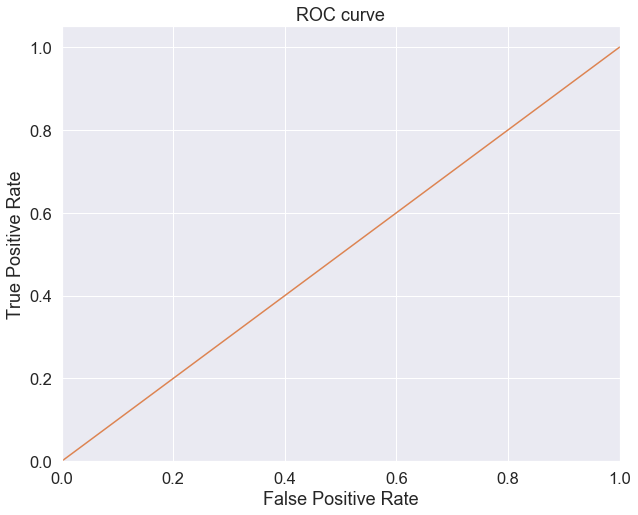

In [18]:
# Построим ROC кроивую для оценки модели в целом
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

При перемешивании логистическая регрессия реагирует не стабильно на этих данных, то имеет схожие показатели, то ниже. Влияние использования shuffle до конца не выявлено после 20 попыток перемешивания и не перемешивания данных.

In [19]:
from sklearn.linear_model import LogisticRegressionCV

# from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)
print(X_scaled.shape)
print(y_train.shape)

# Скормим данные на которых она будет учиться
logReg_cv = LogisticRegressionCV(cv=5, random_state=0, max_iter=70)
logReg_cv.fit(X_scaled.astype(object), y_train)


(295, 10)
(295,)


/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED

ValueError: could not broadcast input array from shape (10,205,11) into shape (10)

In [ ]:
# Выведем точность классификатора данной модели после кросс валидации

print('Оценка логистической регрессии:')
y_pred_cv = logReg_cv.predict(X_test)
print(logReg_cv.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix, '\n')

print(classification_report(y_test, y_pred_cv))

print('\nКак можем видеть точность выше чем у модели без кросс валидации')

In [ ]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_cv, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve after Cross Validation')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Странные вещи с Shape, после отрабатывания алгоритма, которых не было на других данных и другом датасете.
Реализация данного алгоритма на этом датасете откладывается

# Решающее дерево

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Создадим экземпляр решающего дерева и обучим его
classif_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=50) 
classif_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
from sklearn.metrics import accuracy_score

# Предскажем значения
y_pred =  classif_tree.predict(X_test)

print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Точность модели на тестовых данных:  0.06289308176100629


In [22]:
# Используем кросс валидацию для поиска оптимальной глубины 'max_depth'
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
classif_tree_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
classif_tree_cv.fit(X_train, y_train)
tree_model = classif_tree_cv.best_estimator_
print (classif_tree_cv.best_score_, classif_tree_cv.best_params_) 

y_pred_tree_cv = classif_tree_cv.predict(X_test)
print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred_tree_cv))
print('Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке')

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.17288135593220338 {'max_depth': 17}
Точность модели на тестовых данных:  0.14465408805031446
Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке


# Воспользуемся подходом с использованием bagging

0.07547169811320754

Метод:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org


               precision    recall  f1-score   support

           0       0.30      1.00      0.46         8
          24       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         2
          98       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         1
         245       0.00      0.00      0.00         1
         261       0.00      0.00      0.00         1
         301       0.00      0.00      0.00         1
         544       0.00      0.00      0.00         1
         718       0.00      0.00      0.00         1
         730       0.00      0.00      0.00         0
        1024       0.11      1.00      0.20         1
        1153       0.00      0.00      0.00         1
        1185       0.00      0.00      0.00         1
        1217       0.00  

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



               precision    recall  f1-score   support

           0       0.20      1.00      0.33         8
          24       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         2
          98       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         1
         245       0.00      0.00      0.00         1
         261       0.00      0.00      0.00         1
         301       0.00      0.00      0.00         1
         544       0.00      0.00      0.00         1
         718       0.00      0.00      0.00         1
        1024       0.00      0.00      0.00         1
        1153       0.00      0.00      0.00         1
        1185       0.00      0.00      0.00         1
        1217       0.00      0.00      0.00         3
        1303       0.00  


               precision    recall  f1-score   support

           0       0.19      1.00      0.31         8
          24       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         2
          98       0.00      0.00      0.00         1
         104       0.00      0.00      0.00         1
         120       0.00      0.00      0.00         1
         128       0.00      0.00      0.00         1
         245       0.00      0.00      0.00         1
         261       0.00      0.00      0.00         1
         301       0.00      0.00      0.00         1
         544       0.00      0.00      0.00         1
         718       0.00      0.00      0.00         1
        1024       0.00      0.00      0.00         1
        1153       0.00      0.00      0.00         1
        1185       0.00      0.00      0.00         1
        1217       0.00      0.00      0.00         3
        1303       0.00  

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


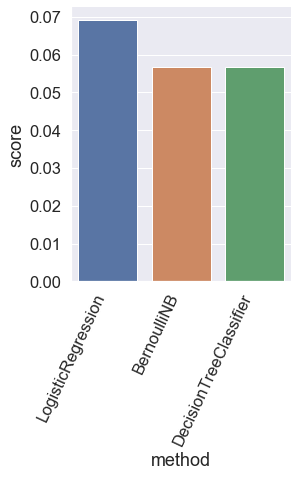

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=100, n_features=4,
#                             n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)

# clf = BaggingClassifier(base_estimator=SVC(),
#                          n_estimators=10, random_state=0).fit(X, y)


# Зададим параметры решающего дерева
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train, y_train)
y_test_pred=bag_model.predict(X_test) # предсказание
print(bag_model.score(X_test, y_test))
# print(confusion_matrix(y_test, y_test_pred)) 

# Используем разные методы
lr = LogisticRegression();
bnb = BernoulliNB()
# gnb = GaussianNB() # Данный метод не используется, так как "Weights sum to zero, can't be normalized"

base_methods=[lr, bnb, dtc] #gnb,
scores = []
output_method_names = []

# Пройдёмся по разным методам и отобразим из точность
for bm  in base_methods:
 print("\nМетод: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm, n_estimators=100, bootstrap=True)
 bag_model=bag_model.fit(X_train, y_train)
 y_test_pred=bag_model.predict(X_test)
 print('\n',classification_report(y_test, y_test_pred))
 model_score = bag_model.score(X_test, y_test)
 print('Score: ', model_score)
 scores.append(model_score)

#  print(confusion_matrix(y_test, y_test_pred)) 

for bm in base_methods:
  name, _ = str(bm).split('(')
  output_method_names.append(name)

scores_df = pd.DataFrame(list(zip(output_method_names, scores)), 
                         columns=['method', 'score'])

print(scores_df) #Наш датафрейм для красивого отображения
    
# Отобразим график алгоритма к его оценке
chart = sns.catplot(x='method', y='score', kind="bar", data=scores_df);

chart.set_xticklabels(rotation=65, horizontalalignment='right')


# Рассмотрим Random Forest реализацию

In [24]:
# Импорт модели, которую будем использовать
from sklearn.ensemble import RandomForestRegressor
# Инстанциируем модель с 1000 деревьями решений
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Натренируем модель на train данных
rf.fit(X_train, y_train);

In [25]:
# Используем метод предсказания 'леса' на тестовых данных
predictions = rf.predict(X_test)
# Высчитаем абсолютные ошибки
errors = abs(predictions - y_test)
# Высчитаем среднюю абсолютную ошибку (mae)
print('Average Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Average Absolute Error: 2901.95 degrees.


In [26]:
# Высчитаем среднюю абсолютную ошибку (MAPE)
mape = 100 * (errors / y_test)
# Высчитаем и отобразим точность
accuracy = 100 - np.mean(mape)
print(mape)
print(accuracy)
# Выкинем nan
print('Accuracy:', round(accuracy, 2), '%.')

[1.04565652e+00 3.59435496e+01 2.61872449e+01 1.12646133e+00
 9.31921162e+00 5.71667872e+00 1.17022075e+01 4.61606371e+00
 1.48708181e+01 1.90309819e+01 5.56705073e+00 7.45613985e-01
 2.98657630e+00 3.35578806e+00 3.01092333e+01 3.16894150e+00
 2.14696133e+00 2.13093036e+01 1.21420796e+00 7.94200195e+01
 2.45114273e+00 2.83592336e+00 4.83053993e+00 2.47423277e+01
 9.90430349e+00 4.65519331e+00 3.84002234e+00 9.73014573e+00
 4.12963438e+00 2.60753688e-01 1.88706049e+00 9.07864700e+00
 4.81273210e-01 9.06471208e+00 6.61331142e+00 2.02900744e+01
 7.18903654e+01            inf            nan 1.49385105e+00
 2.13048951e+01 1.29077787e+00 2.58595806e+01 2.51787755e+01
 1.48048039e+01 8.07889424e-02 4.58369471e-01 2.09375992e+00
            nan 1.42102434e+01 3.98516587e+00 1.23750000e+00
 3.52229167e+02 1.98730769e+01 3.33308824e+00 3.18229189e+00
            nan 3.62857782e-01 6.74160920e+01 1.44427413e-01
 3.08710235e+00 1.63442353e+00 1.20918843e+01 1.94090678e+00
 2.00897641e+00 1.079593

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [27]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

regressor = RandomForestRegressor(n_estimators=1200, random_state=100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

errors = abs(y_pred - y_test)
# Отобразим обученную на расширенных данных
print('Average absolute error: ', round(np.mean(errors), 2), 'degrees.')
print('Mean Asolute Percentage Error')
mape = np.mean(100 * (errors / y_test))


# Отобразим наши метрики
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))

Average absolute error:  2919.59 degrees.
Mean Asolute Percentage Error
Mean Absolute Error: 2919.585623689728
Mean Squared Error: 41716327.58761046
Root Mean Squared Error: 6458.817816567554


/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


# Построим KNN алгоритм

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Объявем кнн классификатор
knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': np.array(np.linspace(1, 40), dtype='int')} 

#Зададим параметры кросс валидации
gs = GridSearchCV(knn, knn_grid, cv=12)
gs.fit(X, y)

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=12.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=12, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  1,  2,  3,  4,  4,  5,  6,  7,  8,  8,  9, 10, 11, 12, 12, 13,
       14, 15, 16, 16, 17, 18, 19, 20, 20, 21, 22, 23, 24, 24, 25, 26, 27,
       28, 28, 29, 30, 31, 32, 32, 33, 34, 35, 36, 36, 37, 38, 39, 40])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
# Зададим функцию отрисовки
def grid_plot(x, y, x_label, title, y_label='roc_auc'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

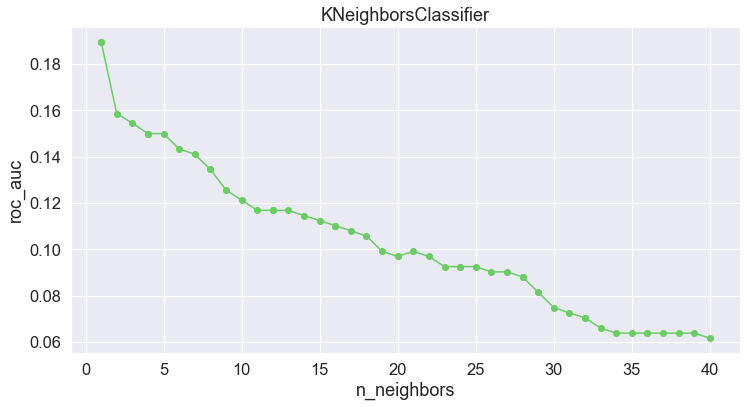

In [30]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [31]:
print(gs.best_params_, gs.best_score_)

{'n_neighbors': 1} 0.1895448079658606


In [32]:
knn = KNeighborsClassifier(n_neighbors=1) #gs.best_model
clf_knn = knn.fit(X_train, y_train)

y_knn = clf_knn.predict(X_test)
y_knn

array([  4437,   1541,   2745,  34111,  10231,   3773,  32231, 170253,
         3276,  49163,  16909,  36814,   4563,  38863,  35506,    730,
         1645, 130482,   5364,   1609,  16581,  34995,  45362,  58904,
        50352,  28605, 106131,   5677,  14608,  18392,  34615, 170253,
         1885,  26716,   1202,   9849,   3276,      0,      0,   3773,
         8206,  14024,   4212,    245, 189146,  53907,   1153,   5798,
            0, 110014, 140008,    128,    755,    105,    402,  34259,
            0,   8944,   3276, 121979,  34093,  40968,   4099,   5889,
        75168,   1507,   2745, 153913,  28605,  27306, 164402, 154873,
         9849,   3775,  33687,  20469,   6553,    128, 136593,  20031,
         2148,   2745,  40968,  72016, 189146,  32231,   5677,   3402,
        68876, 189146,   4915,  42604,  33114,   7145,  11606,      1,
        49538,  73475,  13412,  20949,   1217,   1185,    102,   3869,
            0,  73475,   2252,   7273, 153177,  18392,   5677,      0,
      

In [33]:
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn), '\n')
print(metrics.classification_report(y_test, y_knn))

knn = 0.14465408805031446 

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          58       0.00      0.00      0.00         2
          98       0.00      0.00      0.00         1
         102       0.00      0.00      0.00         0
         104       0.00      0.00      0.00         1
         105       0.00      0.00      0.00         0
         120       0.00      0.00      0.00         1
         128       0.50      1.00      0.67         1
         245       1.00      1.00      1.00         1
         261       0.00      0.00      0.00         1
         301       0.00      0.00      0.00         1
         402       0.00      0.00      0.00         0
         544       0.00      0.00      0.00         1
         718       0.00      0.00      0.00         1

/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/michaelsalamakha/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# Параметры f1 метрики
print('macro = ', metrics.f1_score(y_test, y_knn, average='macro'), ', micro = ', metrics.f1_score(y_test, y_knn, average='micro'))

macro =  0.04975490196078432 , micro =  0.14465408805031446


# Попробуем воспользоваться нейросетевым подходом

In [35]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.keras.backend.clear_session()  # Для чистого/простого сброса состояния notebook.


In [36]:
from tensorflow import keras
from tensorflow.keras import layers

# Подготовим данные для модели
inputs = keras.Input(shape=(10), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(600000, activation='softmax', name='predictions')(x)

# Поместим данные в модель
model = keras.Model(inputs=inputs, outputs=outputs)


In [37]:
# Специфицируем обучающую конфигурацию метрики, потери, оптимизатор
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model by slicing the data into "batches"
# of size "batch_size", and repeatedly iterating over
# the entire dataset for a given number of "epochs"
print('# Fit model on training data')
# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=3,
                    # Добавил валидацию для мониторинга потерь и метрик в конце эпох
                    # validation_data=(x_val, y_val))
history = model.fit(x=X, y=y, batch_size=None, epochs=1,
                   verbose=1, callbacks=None, validation_split=0.0,
                   validation_data=None, shuffle=True, class_weight=None, 
                   sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
                   validation_steps=None, validation_freq=1, max_queue_size=10,
                   workers=1, use_multiprocessing=False)


# Возвращённый объект "Истории" имеет записи значний
# потерь и метрики значения в ходе обучения
print('\nhistory dict:', history.history)

# Оценим модель на тестовых данных используя `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X, y, batch_size=128)
print('test loss, test acc:', results)

# Генерируем предсказания (вероятность -- вывод последнего слоя)
# используем `predict` на новых данных
print('\n# Generate predictions for 3 samples')
predictions = model.predict(X_test[:4])
print('predictions shape:', predictions.shape)


# Fit model on training data
15/15 [==============================] - 8s 523ms/step - loss: 13.2529 - sparse_categorical_accuracy: 0.0529

history dict: {'loss': [13.252896308898926], 'sparse_categorical_accuracy': [0.05286343768239021]}

# Evaluate on test data
4/4 [==============================] - 1s 299ms/step - loss: 12.9485 - sparse_categorical_accuracy: 0.0617
test loss, test acc: [12.948527336120605, 0.06167401000857353]

# Generate predictions for 3 samples
predictions shape: (4, 600000)


In [38]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# скомпилируем keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# import log
# logging.basicConfig(filename="sample.log", level=logging.INFO)
# log = logging.getLogger()

# config = tf.ConfigProto(
#     device_count={'GPU': 1},
#     intra_op_parallelism_threads=1,
#     allow_soft_placement=True
# )

# config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.6

# session = tf.Session(config=config)

# keras.backend.set_session(session)

# seatbelt_model = keras.models.load_model(filepath='./seatbelt.h5')

# SEATBEL_INPUT_SHAPE = (-1, 120, 160, 1)

# def predict_seatbelt(image_arr):
#     try:
#         with session.as_default():
#             with session.graph.as_default():
#                 image_arr = np.array(image_arr).reshape(SEATBEL_INPUT_SHAPE)
#                 predicted_labels = seatbelt_model.predict(image_arr, verbose=1)
#                 return predicted_labels
#     except Exception as ex:
#         log.log('Seatbelt Prediction Error', ex, ex.__traceback__.tb_lineno)

In [39]:
# Скормим keras модели наши данные

X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.35, random_state=0)
model.fit(X_train_keras, y_train_keras, epochs=100, batch_size=10) # Сделаем колличество эпох обучения 100 и посмотрим как обучится модель

Epoch 1/100
30/30 [==============================] - 0s 747us/step - loss: -23572.7090 - accuracy: 0.0068
Epoch 2/100
30/30 [==============================] - 0s 698us/step - loss: -48613.0430 - accuracy: 0.0068
Epoch 3/100
30/30 [==============================] - 0s 766us/step - loss: -82904.2109 - accuracy: 0.0068
Epoch 4/100
30/30 [==============================] - 0s 622us/step - loss: -133996.1250 - accuracy: 0.0068
Epoch 5/100
30/30 [==============================] - 0s 774us/step - loss: -201952.5625 - accuracy: 0.0068
Epoch 6/100
30/30 [==============================] - 0s 741us/step - loss: -305933.8750 - accuracy: 0.0068
Epoch 7/100
30/30 [==============================] - 0s 749us/step - loss: -448085.7812 - accuracy: 0.0068
Epoch 8/100
30/30 [==============================] - 0s 741us/step - loss: -633412.4375 - accuracy: 0.0068
Epoch 9/100
30/30 [==============================] - 0s 837us/step - loss: -885325.8125 - accuracy: 0.0068
Epoch 10/100
30/30 [====================

30/30 [==============================] - 0s 535us/step - loss: -502606912.0000 - accuracy: 0.0068
Epoch 76/100
30/30 [==============================] - 0s 530us/step - loss: -520730048.0000 - accuracy: 0.0068
Epoch 77/100
30/30 [==============================] - 0s 534us/step - loss: -539472384.0000 - accuracy: 0.0068
Epoch 78/100
30/30 [==============================] - 0s 510us/step - loss: -558605440.0000 - accuracy: 0.0068
Epoch 79/100
30/30 [==============================] - 0s 497us/step - loss: -577702784.0000 - accuracy: 0.0068
Epoch 80/100
30/30 [==============================] - 0s 495us/step - loss: -598340032.0000 - accuracy: 0.0068
Epoch 81/100
30/30 [==============================] - 0s 481us/step - loss: -617805568.0000 - accuracy: 0.0068
Epoch 82/100
30/30 [==============================] - 0s 489us/step - loss: -639374208.0000 - accuracy: 0.0068
Epoch 83/100
30/30 [==============================] - 0s 497us/step - loss: -660300288.0000 - accuracy: 0.0068
Epoch 84/100
3

In [40]:
# Отобразим точность модели
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

15/15 [==============================] - 0s 654us/step - loss: -1172152192.0000 - accuracy: 0.0044
Accuracy: 0.44


Итог у нас имеется огромный loss на нейросетевом подходе и некорректный shape в логистической регрессией с подходом кроссвалидации.
Возможно не очень хорошие данные.

При последующих тестированиях я смог получить Tensor metrics_2/acc/Mean_1:0, specified in either feed_devices or fetch_devices was not found in the Graph и пока не получается решить данную проблему.